In [32]:
# Python3 샘플 코드 #


import requests

def get_request_url(YM='201201',NAT_CD='112',ED_CD='E'):
  url = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList'
  service_key = 'U5i63xpIWM48raIRQBYpUXbA/wKd0iO6n/n1+JISyoEW1gWcEiz2No2fHPeid5TZoQN0HV85WyGv6LPwaQ8n4w=='
  params ={'serviceKey' : service_key, 'YM' : YM, 'NAT_CD' : NAT_CD, 'ED_CD' : ED_CD }

  return requests.get(url, params=params)

In [40]:
!pip install xmltodict
import xmltodict
import json
import pandas as pd
def getData(yy = '2012'):
  result = []
  for i in range(1,13):
    try:
      ym = yy + str(i).zfill(2)
      response = get_request_url(ym)
      # xml to dic
      dict_data = xmltodict.parse(response.content,encoding='utf-8')

      # dic to json
      json_str = json.dumps(dict_data,indent=4)  # 문자열형태
      json_data = json.loads(json_str) # json 타입

      # response header resultMsg OK

      if json_data["response"]["header"]["resultMsg"] == "OK":
          data = json_data["response"]["body"]["items"]["item"]
          result.append( [ data["ed"], data["edCd"], data["natCd"], data["natKorNm"],data["num"], data["rnum"], data["ym"] ]  )
    except:
      pass

  return pd.DataFrame(result,columns=['a','b','c','d','e','f','g'])

In [42]:
df = pd.concat([getData(str(i)) for i in range(2012,2025)], axis=0)
df

,a,b,c,d,e,f,g
0,방한외래관광객,E,112,중 국,167022,1,201201
1,방한외래관광객,E,112,중 국,173790,1,201202
2,방한외래관광객,E,112,중 국,183691,1,201203
3,방한외래관광객,E,112,중 국,222114,1,201204
4,방한외래관광객,E,112,중 국,210439,1,201205
...,...,...,...,...,...,...,...
1,방한외래관광객,E,112,중 국,343719,1,202402
2,방한외래관광객,E,112,중 국,391347,1,202403
3,방한외래관광객,E,112,중 국,411331,1,202404
4,방한외래관광객,E,112,중 국,395222,1,202405


In [43]:
df.reset_index(drop=True,inplace=True)
df

,a,b,c,d,e,f,g
0,방한외래관광객,E,112,중 국,167022,1,201201
1,방한외래관광객,E,112,중 국,173790,1,201202
2,방한외래관광객,E,112,중 국,183691,1,201203
3,방한외래관광객,E,112,중 국,222114,1,201204
4,방한외래관광객,E,112,중 국,210439,1,201205
...,...,...,...,...,...,...,...
145,방한외래관광객,E,112,중 국,343719,1,202402
146,방한외래관광객,E,112,중 국,391347,1,202403
147,방한외래관광객,E,112,중 국,411331,1,202404
148,방한외래관광객,E,112,중 국,395222,1,202405


No charts were generated by quickchart


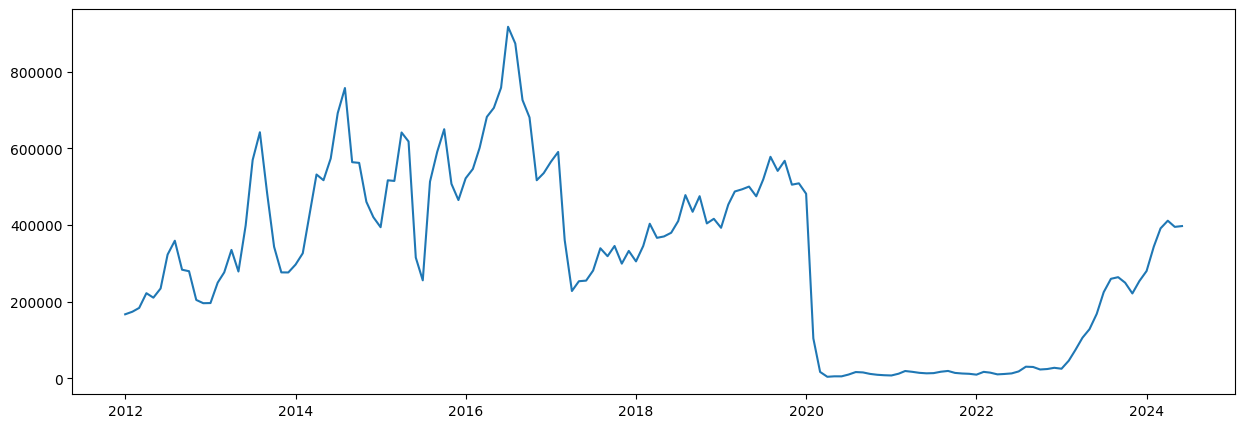

In [51]:
import matplotlib.pyplot as plt
# 년도를 datetime 형식으로 변환
df['g'] = pd.to_datetime(df['g'],format='%Y%m')
df['e'] = pd.to_numeric(df['e'])
plt.figure(figsize=(15,5))
plt.plot(df['g'],df['e'])
plt.show()

In [48]:
df['e']

0      167022
1      173790
2      183691
3      222114
4      210439
        ...  
145    343719
146    391347
147    411331
148    395222
149    397325
Name: e, Length: 150, dtype: object

In [53]:
# 이중 for문으로 개발하기
# 2012  2024
# 201201 ~ 202406
for y in range(2012,2025):
  for m in range(1,13):
    print(str(y)+str(m).zfill(2))

!pip install xmltodict
import xmltodict
import json
import pandas as pd
def getDataAll(start=2012, end=2024):
  result = []
  for y in range(start,end+1):
    for m in range(1,13):
      try:
        ym = str(y)+str(m).zfill(2)
        response = get_request_url(ym)
        # xml to dic
        dict_data = xmltodict.parse(response.content,encoding='utf-8')

        # dic to json
        json_str = json.dumps(dict_data,indent=4)  # 문자열형태
        json_data = json.loads(json_str) # json 타입

        # response header resultMsg OK

        if json_data["response"]["header"]["resultMsg"] == "OK":
            data = json_data["response"]["body"]["items"]["item"]
            result.append( [ data["ed"], data["edCd"], data["natCd"], data["natKorNm"],data["num"], data["rnum"], data["ym"] ]  )
      except:
        pass

  return pd.DataFrame(result,columns=['a','b','c','d','e','f','g'])

201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012
202101
202102
202103
202104
202105
202106
202107
202108
202109
202110
202111
202112
202201
202202
202203
202204
202205
202206
202207
202208
202209
202210
202211
202212
202301
202302
202303
202304
202305
202306
202307
202308
202309
202310
202311